<a href="https://colab.research.google.com/github/saikumar28102000/THE-SPARK-FOUNDATION/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science and Business Analytics Intern @ The Sparks Foundation

#GRIP MARCH 2021
 

### Author: SAI KUMAR T S

 


### Task 1: Prediction using Supervised ML

#### #Linear Regression
 Problem Statement 1: Predict the percentage of a student based on the number of study hours
 
 Problem Statement 2: What will be predicted score if a student studies for 9.25 hrs/day?

##### Data Import and Pre-processing

In [ ]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
df=pd.read_csv('student.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#To show total rows and columns
df.shape

(25, 2)

In [ ]:
# Data Types of Columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
# To check any Null Values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# To check any duplicate rows
df.duplicated().sum()

0

### Basic Statistical Details

In [ ]:
# Statistical Details
df .describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


   ### Data Visualization

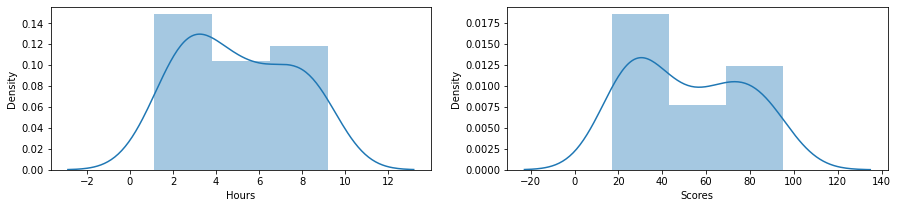

In [ ]:
plt.figure(figsize=(15,3))

plt.subplot(121)
sns.distplot(df.Hours);

plt.subplot(122)
sns.distplot(df.Scores);


plt.show()

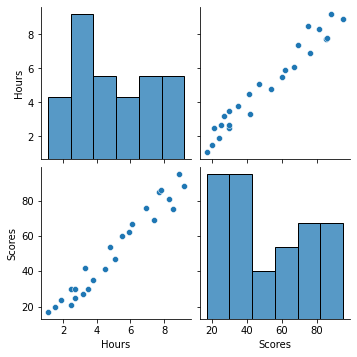

In [ ]:
#visualizing the dataset by pairplot
sns.pairplot(df)

#### The graph shows a linear relationship between the number of hours studied and the scores achieved

In [ ]:
# To see the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

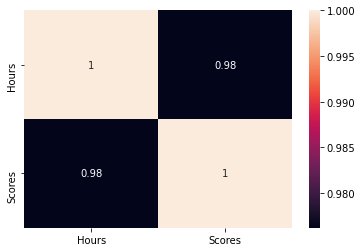

In [ ]:
# Heatmap to see the correlatio
sns.heatmap(df.corr(),annot=True)

#### Scores and Hours have high +ve correlation
They are highly dependent to each other

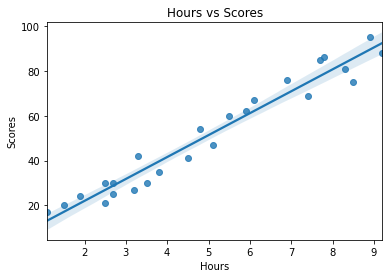

In [ ]:
# Regressive Plotting between Hours and Scores
sns.regplot(df.Hours,df.Scores,data=df)
plt.title("Hours vs Scores")
plt.show()

This graph also shows a +ve linear relationship

### Model Development and Evaluation

##### Data Preparation

In [ ]:
# separate independent and dependent var
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
 #split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0) 

##### Training Algorithm

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression

In [ ]:
#Linear Regresion
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Prediction
y_pred = reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_pred})
comp_df

,Actual_data,Predicted_data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


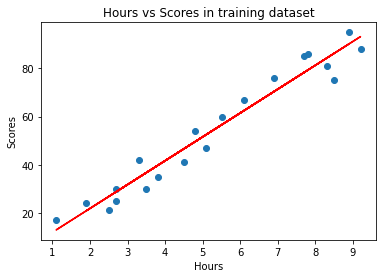

In [ ]:
#visualization of training set
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs Scores in training dataset")
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='red')


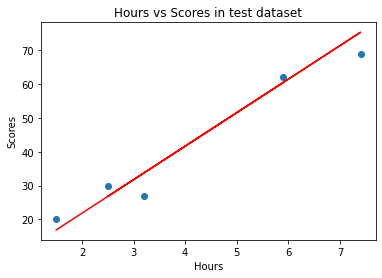

In [ ]:
#visualization of test set
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs Scores in test dataset")
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')

##### Coefficient and Intercept

In [ ]:
print("Coefficient : ", reg.coef_)

print("Intercept : ", reg.intercept_)

Coefficient :  [9.91065648]
Intercept :  2.018160041434683


##### Evaluating the Model

In [ ]:
from sklearn import metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))

print("\nMean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))

print("\nRoot Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

print("\nR-2 : ",metrics.r2_score(y_test,y_pred))



Mean Absolute Error :  4.183859899002975

Mean Squared Error :  21.5987693072174

Root Mean Squared Error :  4.6474476121003665

R-2 :  0.9454906892105356


R-squared value is 94.55%. 
This implies that the algorithm has proven to be good for the given data

##### Sample Question:
    
What will be predicted score if a student studies for 9.25 hrs/day?

In [ ]:
hours = 9.25
print("no.of hours = ",hours)
pred_score = reg.predict([[hours]])
print("Predicted Score = ", pred_score[0])


no.of hours =  9.25
Predicted Score =  93.69173248737538


### Conclusion

-The hours studied and the scores have high +ve correlation.

-It is evident from the regplot that they have a +ve linear relatiopnship

- If a student studies for 9.25hrs/day, the student would likely to get around 93.69%